Miniproyecto 1
==============

### 1.- Lectura y análisis exploratorio de datos

In [1]:
import pandas as pd                                 #cargar la libreria pandas
import numpy as np
data_1 = pd.read_csv("ejemplo_data.csv")            #cargar el dataset como data_1
data_1                                              #inpeccionar elementos

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


In [2]:
data_1.info()                                       #inpeccionar tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 512.0+ bytes


In [3]:
data_1["ID"].info()                                 #la columna ID ya se encuentra comnvertida como entero en el dataset

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: ID
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


>* Se cambian los valores de la columna Activo a boleano, asumiendo de **n es un valor igual a 0**
>* Se verifica que ademas estos valores corresponden a su variable boleana (1=True, 0=False)  
>*El tipo de variable para Activo es boleana*

In [4]:
data_1["Activo"] = np.where(data_1["Activo"] == "1", True, False)  # Indica que todos los valores igual a 1 son True y todos los demas False

In [5]:
data_1["Activo"]

0     True
1    False
2     True
3     True
4    False
5    False
Name: Activo, dtype: bool

>* Se procede a cambiar las variables de la columna Unidades a entero y se verifican los valores

In [6]:
data_1["Unidades"] = pd.to_numeric(data_1['Unidades'], errors='coerce').fillna(0)
data_1["Unidades"] = data_1["Unidades"].astype("int")
data_1


,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,0,2-15-2014,False
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,0,2-15-2014,False


In [7]:
data_1["Unidades"]

0    500
1    700
2    125
3     75
4      0
5      0
Name: Unidades, dtype: int32

>* Cambiar la columna **2016** a float, mediante una funcion lambda que elimine los simbolos "$" y "," y ademas los transforme a float

In [8]:
data_1["2016"] = data_1["2016"].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [9]:
data_1["2016"]

0    125000.0
1    920000.0
2     50000.0
3    350000.0
4     15000.0
5    -15000.0
Name: 2016, dtype: float64

> * Vista de las variables final segun lo solicitado

In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6 non-null      int64  
 1   Nombre       6 non-null      object 
 2   2016         6 non-null      float64
 3   2017         6 non-null      object 
 4   Crecimiento  6 non-null      object 
 5   Unidades     6 non-null      int32  
 6   fecha        6 non-null      object 
 7   Activo       6 non-null      bool   
dtypes: bool(1), float64(1), int32(1), int64(1), object(4)
memory usage: 446.0+ bytes


### 2.- Estadísticas descriptivas

> *  Cree un diccionario con 20 datos que contenga al menos dos atributos continuos y una variable categórica (por ejemplo: nombre, nota, edad).

> (Estos datos corresponde a un extracto de la DB de eventos de huracanes, la que corresponden a nombre del huracan, año de erupcion y cantidad de fallecimientos en el evento.)

In [11]:
dicc = {
    "Nombre": pd.Series(['Cuba I', 'San Felipe II Okeechobee', 'Bahamas', 'Cuba II', 'CubaBrownsville', 'Tampico', 'Labor Day',
        'New England', 'Carol', 'Janet', 'Carla', 'Hattie', 'Beulah', 'Camille', 'Edith', 'Anita', 'David', 'Allen', 'Gilbert', 'Hugo']),
    "Año": pd.Series([1924, 1928, 1932, 1932, 1933, 1933, 1935, 1938, 1953, 1955, 1961, 1961, 1967, 1969, 1971, 1977, 1979, 1980,
         1988, 1989]),
    "IndiceM": pd.Series([90, 4000, 16, 3103, 179, 184, 408, 682, 5, 1023, 43, 319, 688, 259, 37, 11, 2068, 269, 318, 107])
}

> * Transforme dicho diccionario a un data frame de pandas.

In [12]:
df = pd.DataFrame(dicc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nombre   20 non-null     object
 1   Año      20 non-null     int64 
 2   IndiceM  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [13]:
df.head()

,Nombre,Año,IndiceM
0,Cuba I,1924,90
1,San Felipe II Okeechobee,1928,4000
2,Bahamas,1932,16
3,Cuba II,1932,3103
4,CubaBrownsville,1933,179


> * Obtenga estadísticas descriptivas de tendencia central.

In [14]:
df.describe(include="all")

,Nombre,Año,IndiceM
count,20,20.000000,20.000000
unique,20,NaN,NaN
top,Cuba I,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1955.250000,690.450000
std,NaN,21.771239,1099.130349
min,NaN,1924.000000,5.000000
25%,NaN,1933.000000,78.250000
50%,NaN,1958.000000,264.000000
75%,NaN,1972.500000,683.500000


* De acuerdo a la tabla descrita se puede inferir lo siguiente:
    + Cantidad de datos por columna son *20*
    + El promedio para **IndiceM** es *690.45*
    + Desviacion estandar con respecto a los años que ocurrieron los eventos *21.77*
    + La media de **IndiceM** corresponde a *264*
    + Cantidad minima segun la DB de fallecimientos en en un evento es de *5*
    + Cantidad maxima segun la DB de fallecimientos en en un evento es de *4000*
    

In [15]:
# Calculo de varianza
print("Desviacion estandar para IndiceM: ", np.round(np.var(df["IndiceM"], ddof=1), 2))

Desviacion estandar para IndiceM:  1208087.52


In [16]:
cuantiles = df[["Año", "IndiceM"]].quantile([0.25, 0.5, 0.75])
print(cuantiles)

         Año  IndiceM
0.25  1933.0    78.25
0.50  1958.0   264.00
0.75  1972.5   683.50


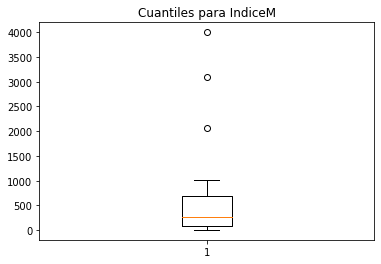

In [17]:
# Boxplot para los cuantiles

import matplotlib.pyplot as plt
plt.boxplot(df["IndiceM"])
plt.title("Cuantiles para IndiceM")
plt.show()


>* Se observa que para el boxplot existen 3 valores atipicos que corresponden a fallecimientos en un evento sobre las 2000 personas

### 3.- Transformación e imputación de datos

In [18]:
data_2 = pd.read_csv("ejemplo_data2.csv")            #cargar el dataset como data_2
data_2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


> * Informacion del dataset

In [19]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [20]:
data_2.describe().applymap(lambda x:f"{x:0.3f}")       #applymap permite ver describe en DB con solo 3 decimales

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13518.000,13580.000,7130.000,8205.000,13580.000,13580.000,13580.000
mean,2.938,1075684.079,10.138,3105.302,2.915,1.534,1.610,558.416,151.968,1964.684,-37.809,144.995,7454.417
std,0.956,639310.724,5.869,90.677,0.966,0.692,0.963,3990.669,541.015,37.274,0.079,0.104,4378.582
min,1.000,85000.000,0.000,3000.000,0.000,0.000,0.000,0.000,0.000,1196.000,-38.183,144.432,249.000
25%,2.000,650000.000,6.100,3044.000,2.000,1.000,1.000,177.000,93.000,1940.000,-37.857,144.930,4380.000
50%,3.000,903000.000,9.200,3084.000,3.000,1.000,2.000,440.000,126.000,1970.000,-37.802,145.000,6555.000
75%,3.000,1330000.000,13.000,3148.000,3.000,2.000,2.000,651.000,174.000,1999.000,-37.756,145.058,10331.000
max,10.000,9000000.000,48.100,3977.000,20.000,8.000,10.000,433014.000,44515.000,2018.000,-37.409,145.526,21650.000


> * Verificar cuantos valores nulos estan presentes en el dataset

In [21]:
data_2.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [22]:
print(data_2["Car"].unique())               # valores unicos para Car.

[ 1.  0.  2.  6.  5.  4.  3.  8.  7.  9. 10. nan]


In [23]:
print(data_2["YearBuilt"].nunique())        # Cantidad de valores unicos para YearBuilt.

144


In [24]:
print(data_2["CouncilArea"].unique())       # Serie para las categorias dentro de CouncilArea.

['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse'
 'Maribyrnong' 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne'
 'Kingston' 'Brimbank' 'Hume' nan 'Knox' 'Maroondah' 'Casey' 'Melton'
 'Greater Dandenong' 'Nillumbik' 'Whittlesea' 'Frankston' 'Macedon Ranges'
 'Yarra Ranges' 'Wyndham' 'Cardinia' 'Unavailable' 'Moorabool']


* De acuerdo al diagnostico, tenemos 4 variables que presentan datos faltantes:
    + __Car__ que puede corresponder a la cantidad de espacios de vehiculos en la vivienda, al ser categorico, con pocos valores unicos y de pocos faltantes en el DB, se puede estudiar con mas detalle.
    + __BuildingArea__ con una cantidad importante de faltantes, es necesario encontrar un metodo para rellenar y no perder estos datos, se observa que estan presentes datos atipicos importantes dentro de la variable con respecto a su media.
    + __YearBuilt__ Año de contruccion de la vivienda, cantidad importante de faltantes tomada como categorica, abarca un rango de 143 valores para los años mas NaN.
    + __CouncilArea__ Variable categorica que indica su ubicacion dentro del consejo, con 33 valores unicos.

> * __Para BuildingArea__ se procede a probar a rellenar los valores faltantes con el _promedio, mediana, backfill y ffill_ y compararlos con la distribucion original.

In [25]:
mean = data_2.BuildingArea.mean()
print(data_2.BuildingArea.fillna(mean).describe())
print(data_2.BuildingArea.describe())

count    13580.000000
mean       151.967650
std        392.002962
min          0.000000
25%        122.000000
50%        151.967650
75%        151.967650
max      44515.000000
Name: BuildingArea, dtype: float64
count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64


In [26]:
median = data_2.BuildingArea.median()
print(data_2.BuildingArea.fillna(median).describe())
print(data_2.BuildingArea.describe())

count    13580.000000
mean       139.633972
std        392.217403
min          0.000000
25%        122.000000
50%        126.000000
75%        129.940000
max      44515.000000
Name: BuildingArea, dtype: float64
count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64


> * Para los metodos de fillna con la media y la mediana, en ambos casos la desviacion estandar es similar, sin embargo, el promedio difiere en 20 unidades para fillna con la mediana y los cuantiles con fillna en la media estan mas uniformes por sobre el 50% de los datos.

In [27]:
data_fillb = data_2.BuildingArea.fillna(method="backfill")
print(data_fillb.describe())
print(data_2.BuildingArea.describe())

count    13580.000000
mean       150.233190
std        396.886937
min          0.000000
25%         94.000000
50%        127.000000
75%        176.000000
max      44515.000000
Name: BuildingArea, dtype: float64
count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64


In [28]:
data_fillf = data_2.BuildingArea.fillna(method="ffill")
print(data_fillf.describe())
print(data_2.BuildingArea.describe())

count    13579.000000
mean       150.035168
std        399.065345
min          0.000000
25%         94.000000
50%        127.000000
75%        175.000000
max      44515.000000
Name: BuildingArea, dtype: float64
count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64


> * Para los casos con fillna por backfill y ffill, en ambos casos la distribucion se mantiene similar a la original, destacando que para fillna con ffill se omite el ultimo dato considerando las caracteristicas del metodo.

> * Se procede a tratar de codificar numericamente para analisis la variable _CouncilArea_, sin embargo, se considera no rellenar los datos faltantes ya que se necesita un analisis cruzado de acuerdo a la ubicacion descrita con los datos disponibles por lo que no es posible asumir los datos faltantes a mi consideracion.

In [29]:
data_2["CouncilArea"].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

> * Como se dijo anteriormente existen 33 categorias unicas para la variable _CouncilArea_, se tratara de esta manera un __OHE (One-Hot Encoding)__ para cada categoria. Esto producira una matriz numerica de [13580 x 33] valores.

In [30]:
council = data_2["CouncilArea"]
cat_council = pd.get_dummies(council)
print(cat_council.head())

   Banyule  Bayside  Boroondara  Brimbank  Cardinia  Casey  Darebin  \
0        0        0           0         0         0      0        0   
1        0        0           0         0         0      0        0   
2        0        0           0         0         0      0        0   
3        0        0           0         0         0      0        0   
4        0        0           0         0         0      0        0   

   Frankston  Glen Eira  Greater Dandenong  ...  Moreland  Nillumbik  \
0          0          0                  0  ...         0          0   
1          0          0                  0  ...         0          0   
2          0          0                  0  ...         0          0   
3          0          0                  0  ...         0          0   
4          0          0                  0  ...         0          0   

   Port Phillip  Stonnington  Unavailable  Whitehorse  Whittlesea  Wyndham  \
0             0            0            0           0         

In [31]:
cat_council.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Banyule            13580 non-null  uint8
 1   Bayside            13580 non-null  uint8
 2   Boroondara         13580 non-null  uint8
 3   Brimbank           13580 non-null  uint8
 4   Cardinia           13580 non-null  uint8
 5   Casey              13580 non-null  uint8
 6   Darebin            13580 non-null  uint8
 7   Frankston          13580 non-null  uint8
 8   Glen Eira          13580 non-null  uint8
 9   Greater Dandenong  13580 non-null  uint8
 10  Hobsons Bay        13580 non-null  uint8
 11  Hume               13580 non-null  uint8
 12  Kingston           13580 non-null  uint8
 13  Knox               13580 non-null  uint8
 14  Macedon Ranges     13580 non-null  uint8
 15  Manningham         13580 non-null  uint8
 16  Maribyrnong        13580 non-null  uint8
 17  Maroondah   

> * Se procede a transformar las variables categoricas del DB segun el metodo __OHE__

In [32]:
data_cat = pd.DataFrame(list(zip(data_2["Suburb"], data_2["Address"],data_2["Type"], data_2["Method"], data_2["SellerG"], data_2["CouncilArea"], data_2["Regionname"]))
, columns =["Suburb", "Address", "Type", "Method", "SellerG", "CouncilArea", "Regionname"]) 
data_cat.head()

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,Yarra,Northern Metropolitan


In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
data_cat_oneHot = encoder.fit_transform(data_cat)
array_data_cat = data_cat_oneHot.toarray()
array_data_cat.shape


(13580, 14010)

### 4.- Visualizacion de Datos

In [34]:
# importar librerias solicitadas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

> * Creacion de base de datos con numpy.random.multivariate_normal

In [35]:
mean = (9,2)
cov = [[1,0], [0,1]]
db1 = np.random.multivariate_normal(mean, cov, 500)
db1 = np.hstack([db1, np.zeros((db1.shape[0], 1))])


In [36]:
db1 = pd.DataFrame(db1, columns = ["A", "B", "C"])
db1

,A,B,C
0,8.559896,1.787952,0.0
1,8.386475,2.601031,0.0
2,9.166229,3.027869,0.0
3,9.530867,2.127744,0.0
4,10.300775,2.241551,0.0
...,...,...,...
495,9.516895,0.912313,0.0
496,9.117138,1.849747,0.0
497,9.412854,1.844975,0.0
498,9.893524,0.820709,0.0


In [37]:
np.cov(db1.T)                                               # Matriz de covarianza simetrica y positiva

array([[1.00592129, 0.00468125, 0.        ],
       [0.00468125, 1.03923679, 0.        ],
       [0.        , 0.        , 0.        ]])

In [38]:
mean = (5,1)
cov = [[1,0], [0,1]]
db2 = np.random.multivariate_normal(mean, cov, 500)
db2 = np.hstack([db2, np.ones((db2.shape[0], 1))])

In [39]:
db2 = pd.DataFrame(db2, columns = ["A", "B", "C"])
db2

,A,B,C
0,5.598137,1.420767,1.0
1,4.966346,1.970450,1.0
2,3.569788,-0.175749,1.0
3,5.145692,-0.194703,1.0
4,3.477748,1.358550,1.0
...,...,...,...
495,3.954701,-0.714857,1.0
496,6.873772,0.158382,1.0
497,3.329777,-1.295057,1.0
498,4.480748,0.551451,1.0


In [40]:
np.cov(db2.T)                                                   # Matriz de covarianza simetrica y positiva

array([[1.01242657, 0.0810198 , 0.        ],
       [0.0810198 , 1.07391726, 0.        ],
       [0.        , 0.        , 0.        ]])

C:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


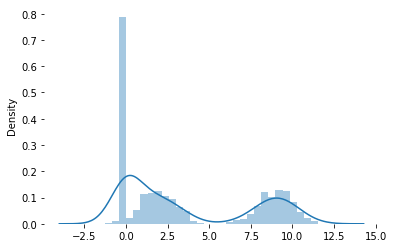

In [41]:
sns.distplot(db1, bins=30)
sns.despine(left=True, bottom=True)                             # modifica la visualizacion de los bordes de los ejes dentro del grafico
sns.set_context("talk", font_scale =.3)
sns.set_palette("dark")

> * Generar grafico de dispersion para las bases de datos 

In [42]:
# Concatenar ambos DB en un dataframe
ct_data = np.concatenate([db1, db2])
ct_data = pd.DataFrame(ct_data, columns=["A", "B", "C"])
ct_data

,A,B,C
0,8.559896,1.787952,0.0
1,8.386475,2.601031,0.0
2,9.166229,3.027869,0.0
3,9.530867,2.127744,0.0
4,10.300775,2.241551,0.0
...,...,...,...
995,3.954701,-0.714857,1.0
996,6.873772,0.158382,1.0
997,3.329777,-1.295057,1.0
998,4.480748,0.551451,1.0


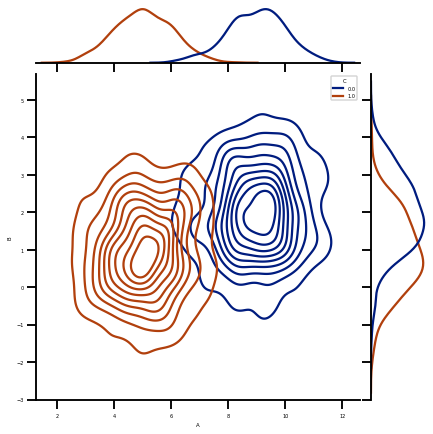

In [43]:
sns.jointplot(x="A", y="B", data=ct_data, hue="C", kind="kde")
sns.set_context("talk", font_scale =.6)                         # Context cambia el tamaño del grafico y modifica el tamaño de fuente
sns.set_palette("deep")                                         # modifica la paleta de colores del grafico

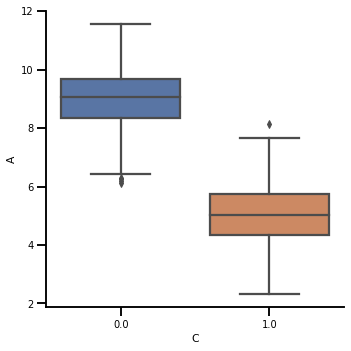

In [44]:
# Box-Plot por categorias
sns.catplot(x="C", y="A", kind="box", data= ct_data)
sns.set_context("notebook", font_scale =.6)    